# Escalamiento de datos numéricos

### Transformaciones lineales

In [32]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import plotly.express as px

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

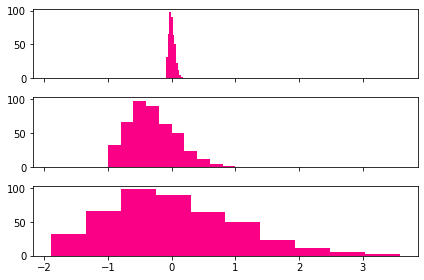

In [17]:
# escalamiento por el metodo del max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw) # Normalizacion de datos




# normalización por el metodo del  Z-score

avg = np.average(raw) # μ media u averaje de raw
std = np.std(raw) # σ la desviación estándar de la población raw
z_scaled = (raw - avg)/std # comparan cada valor de raw para saber el Z-Score, esto es la misma que scaled del metodo anterior solo que calculado por otro metodo y luego se compara a ver cual normalizo de mejor manera los datos del dataset raw



# Graficas

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw, 
            color='#FA0087')
axs[1].hist(scaled, 
            color='#FA0087')
axs[2].hist(z_scaled, 
            color='#FA0087')


plt.show()

In [18]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [19]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)

print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.0628586999999925 
trainning time for scaled data : 0.032105399999977635
trainning time for z_scaled data : 0.03206260000001748


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [20]:
df = pd.read_csv('cars.csv')

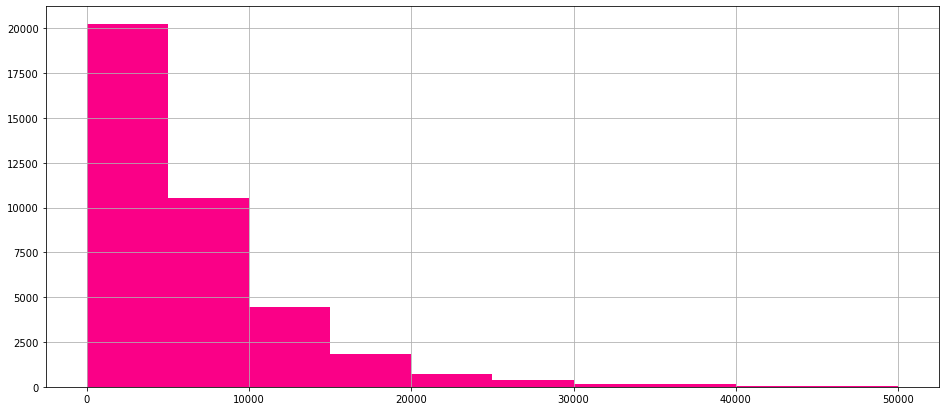

In [33]:
fig = plt.figure(figsize=(16,7))

df.price_usd.hist(color='#FA0087')

plt.show()

In [22]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


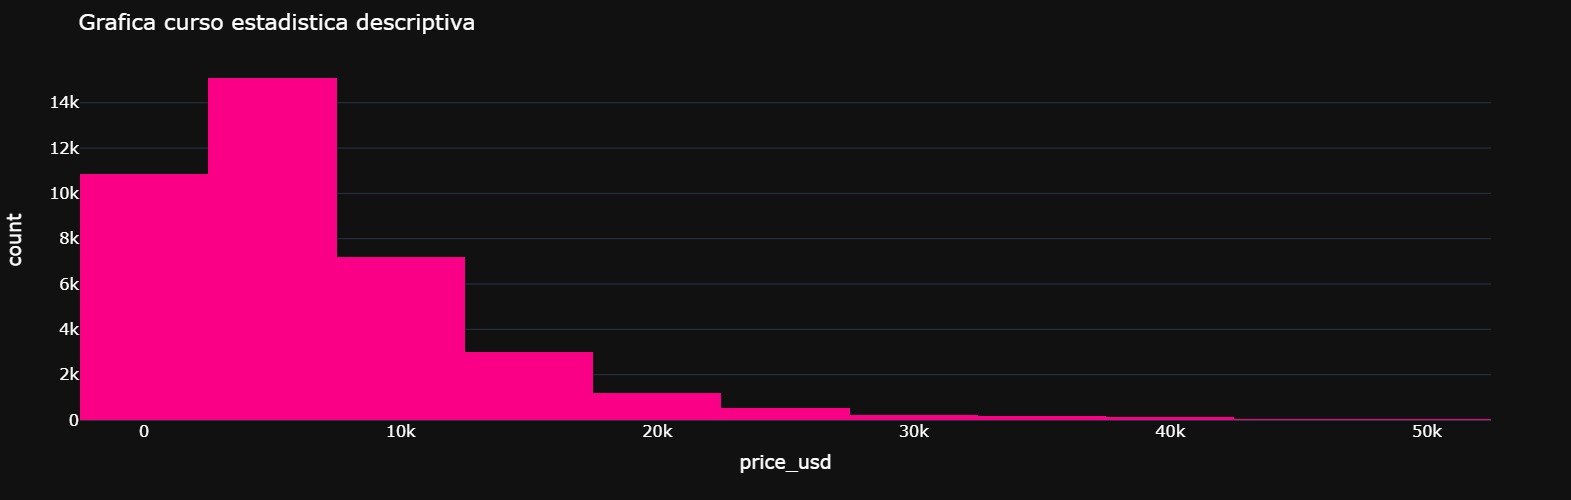

In [29]:
fig2 = px.histogram(df, 
                    x="price_usd", 
                    nbins=10,
                    color_discrete_sequence=['#FA0087'])

fig2.update_layout(title = 'Grafica curso estadistica descriptiva',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900)
fig2.show()

Transformación con $$tanh(x)$$

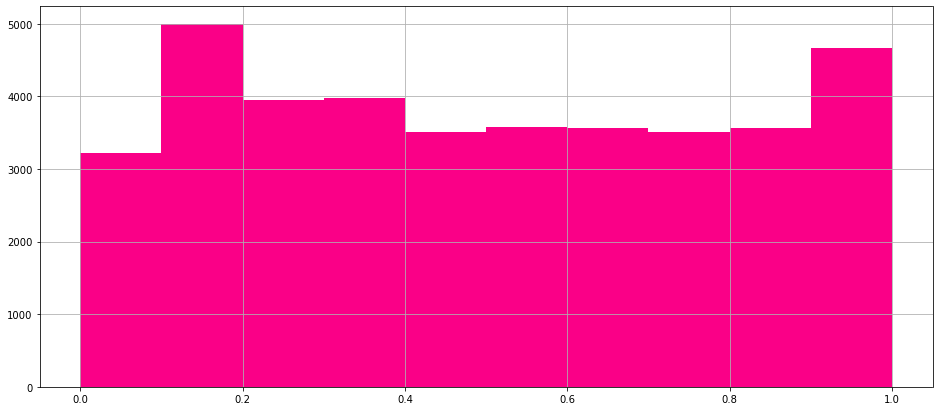

In [34]:
p = 9000

fig = plt.figure(figsize=(16,7))

df.price_usd.apply(lambda x: np.tanh(x/p)).hist(color='#FA0087')

plt.show()

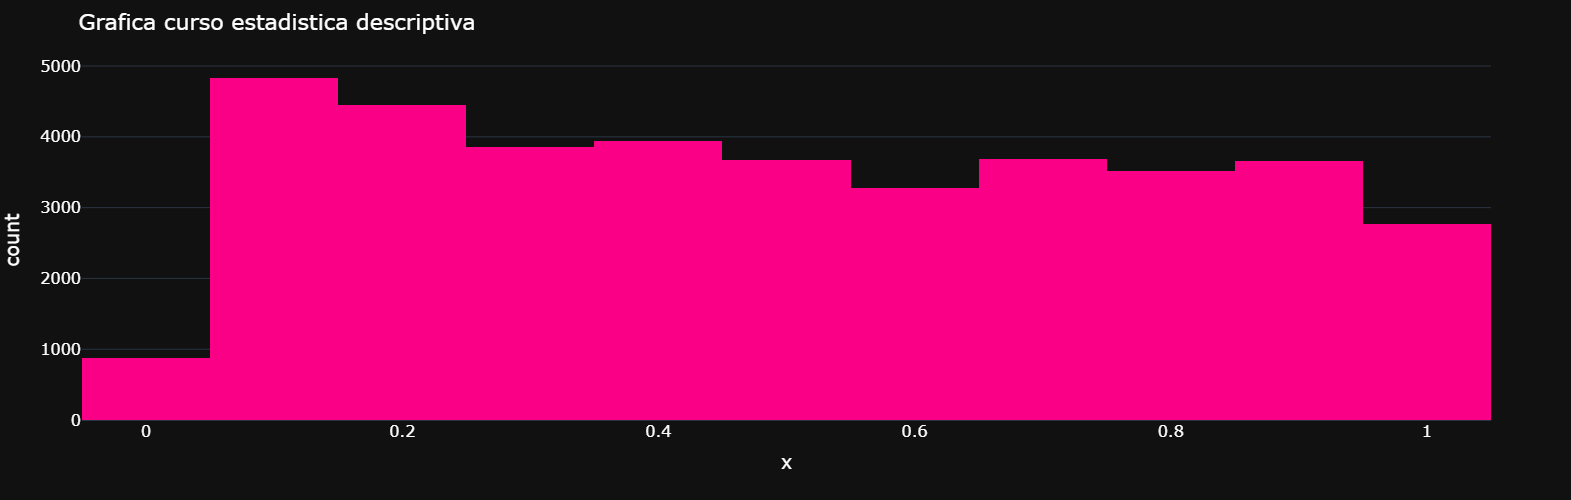

In [31]:
fig2 = px.histogram(df, 
                    x=df.price_usd.apply(lambda x: np.tanh(x/p)), 
                    nbins=10, 
                    color_discrete_sequence=['#FA0087'])

fig2.update_layout(title = 'Grafica curso estadistica descriptiva',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900)
fig2.show()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py